# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


In [3]:
print(cities[2])


puerto natales


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={weather_api_key}&q="
#city_weather1 = requests.get(query_url+"Paris").json()
#print(city_weather1)

In [5]:
#city_weather1["dt"]

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url+city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather ['coord']['lat']
        city_lng = city_weather ['coord']['lon']
        city_max_temp = city_weather ["main"]["temp_max"]
        city_humidity = city_weather ["main"]["humidity"]
        city_clouds = city_weather ["clouds"]["all"]
        city_wind = city_weather ["wind"]["speed"]
        city_country = city_weather ["sys"]["country"]
        city_date = city_weather ["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 2 of Set 1 | aasiaat
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | mabaruma
Processing Record 5 of Set 1 | pandan
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | bronnitsy
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | weno
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | severo-yeniseyskiy
Processing Record 14 of Set 1 | saint croix
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | vozhega
Processing Record 17 of Set 1 | bubaque
Processing Record 18 of Set 1 | tarawa
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | tangermunde
Processing Record 21 of Set 1 | gle

In [7]:
#city_data

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,262.93,99,89,2.17,GL,1731284281
1,puerto natales,-51.7236,-72.4875,277.56,93,63,2.72,CL,1731284128
2,mabaruma,8.2000,-59.7833,299.87,82,71,2.49,GY,1731284283
3,pandan,14.0453,124.1694,300.12,88,100,4.86,PH,1731284284
4,hawaiian paradise park,19.5933,-154.9731,300.88,78,75,4.63,US,1731284286


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,262.93,99,89,2.17,GL,1731284281
1,puerto natales,-51.7236,-72.4875,277.56,93,63,2.72,CL,1731284128
2,mabaruma,8.2000,-59.7833,299.87,82,71,2.49,GY,1731284283
3,pandan,14.0453,124.1694,300.12,88,100,4.86,PH,1731284284
4,hawaiian paradise park,19.5933,-154.9731,300.88,78,75,4.63,US,1731284286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [12]:
#lat vs. temp

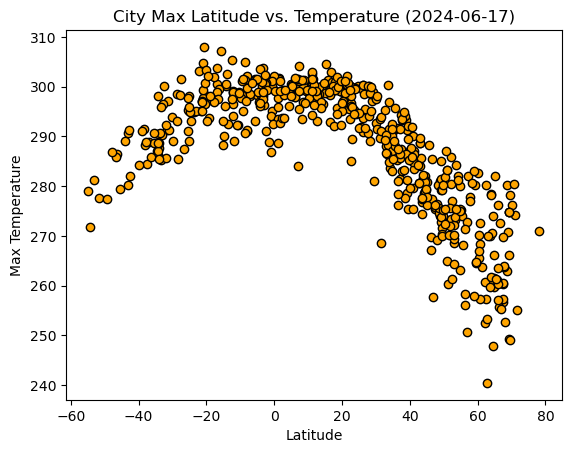

In [13]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values,color="orange",edgecolors='black')
plt.colors='black'
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f"City Max Latitude vs. Temperature (2024-06-17)")
plt.savefig("output_data/Fig1.png")
plt.show()

#### Latitude Vs. Humidity

In [14]:
# lat vs humidity

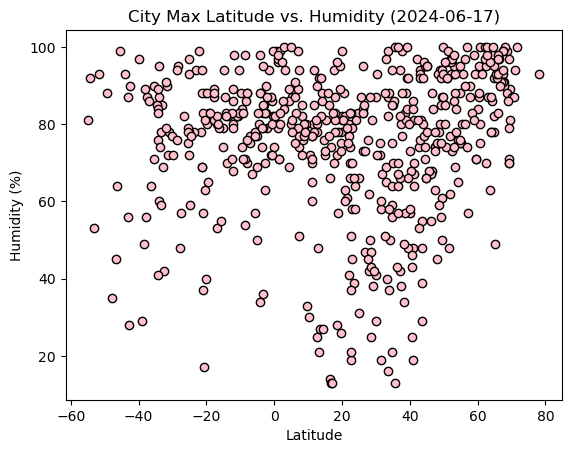

In [15]:
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values,color="pink",edgecolors='black')
plt.colors='black'
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Max Latitude vs. Humidity (2024-06-17)")
plt.savefig("output_data/Fig2.png")
plt.show()

#### Latitude Vs. Cloudiness

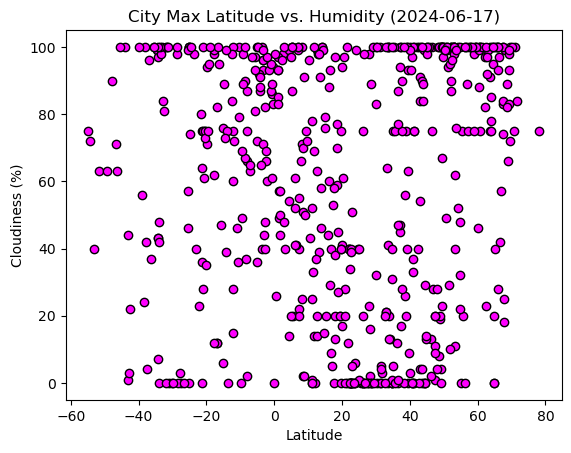

In [16]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,color="magenta",edgecolors='black')
plt.colors='black'
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Max Latitude vs. Humidity (2024-06-17)")
plt.savefig("output_data/Fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

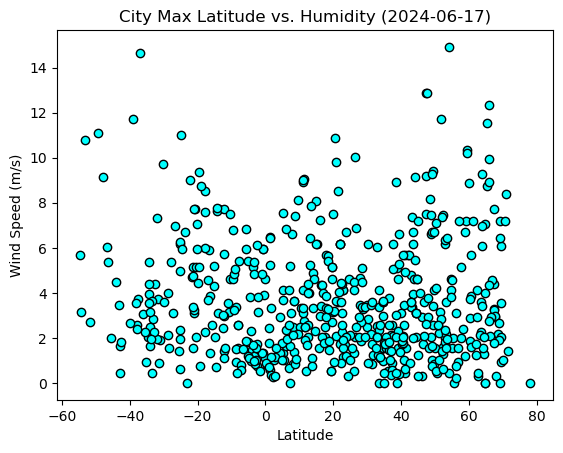

In [17]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values,color="cyan",edgecolors='black')
plt.colors='black'
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Max Latitude vs. Humidity (2024-06-17)")
plt.savefig("output_data/Fig4.png")
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,262.93,99,89,2.17,GL,1731284281
2,mabaruma,8.2000,-59.7833,299.87,82,71,2.49,GY,1731284283
3,pandan,14.0453,124.1694,300.12,88,100,4.86,PH,1731284284
4,hawaiian paradise park,19.5933,-154.9731,300.88,78,75,4.63,US,1731284286
6,bronnitsy,55.4194,38.2708,274.09,80,75,2.00,RU,1731284288


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto natales,-51.7236,-72.4875,277.56,93,63,2.72,CL,1731284128
5,ushuaia,-54.8000,-68.3000,278.96,81,75,5.66,AR,1731284287
7,port-aux-francais,-49.3500,70.2167,277.42,88,63,11.09,TF,1731284289
12,avarua,-21.2078,-159.7750,297.18,69,75,5.14,CK,1731284296
20,lorengau,-2.0226,147.2712,301.39,79,60,3.14,PG,1731284306


###  Temperature vs. Latitude Linear Regression Plot

In [23]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Max Temp"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      265.709804
2      301.985048
3      298.480828
4      295.154837
6      273.677315
          ...    
567    266.395385
568    299.557099
570    297.199110
572    286.118428
573    300.210847
Name: Lat, Length: 410, dtype: float64
y = -0.6x +306.9


The r^2-value is: 0.7485041700221886


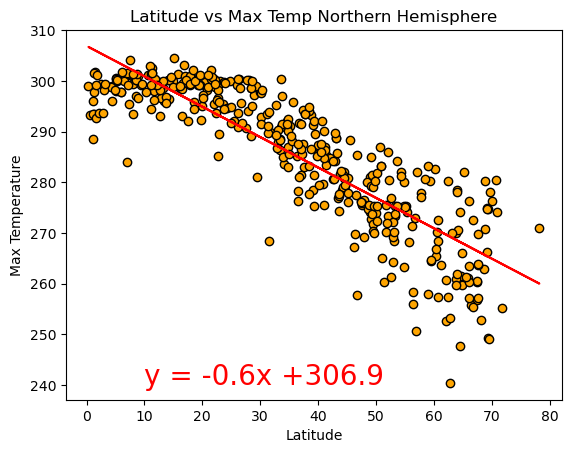

In [24]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values,color="orange",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,240),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temp Northern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig5.png")
plt.show()

In [27]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Max Temp"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
1      284.719133
5      283.737050
7      285.476860
12     294.460730
20     300.585246
          ...    
554    300.152464
561    300.409094
566    293.377706
569    294.989952
571    299.104747
Name: Lat, Length: 164, dtype: float64
y = 0.32x +301.23


The r^2-value is: 0.4794646039077535


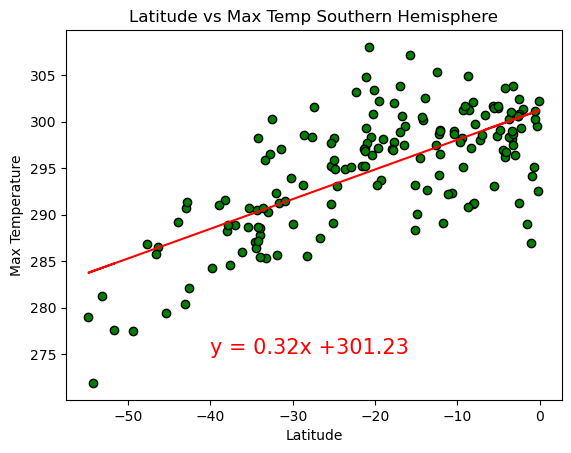

In [28]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values,color="green",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,275),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title("Latitude vs Max Temp Southern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** The two hemispheres behave almost the same considring that the slopes are very similar, however there are more places in the northern hemisphere, the correlation apart from the line is greater in the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [31]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Humidity"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      82.409325
2      69.508494
3      70.754726
4      71.937572
6      79.575780
         ...    
567    82.165506
568    70.371963
570    71.210552
572    75.151256
573    70.139466
Name: Lat, Length: 410, dtype: float64
y = 0.21x +67.76


The r^2-value is: 0.045279964994466924


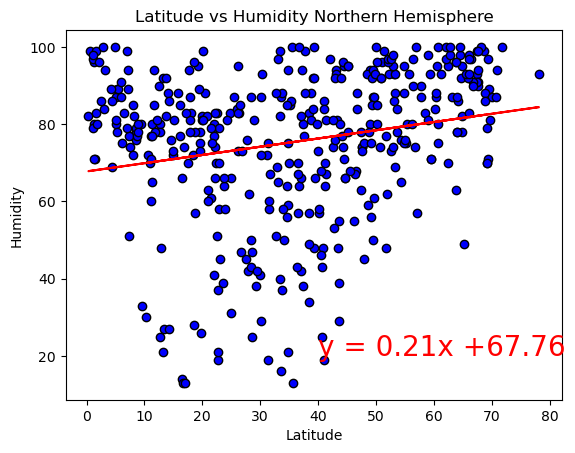

In [32]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values,color="blue",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity Northern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig7.png")
plt.show()

In [37]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Humidity"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
1      71.878319
5      71.430278
7      72.224006
12     76.322587
20     79.116686
         ...    
554    78.919244
561    79.036323
566    75.828495
569    76.564026
571    78.441259
Name: Lat, Length: 164, dtype: float64
y = 0.15x +79.41


The r^2-value is: 0.01643164225925584


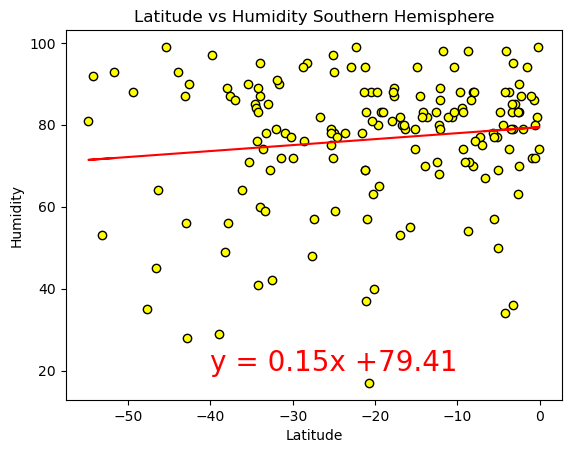

In [39]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values,color="yellow",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Humidity Southern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** Slopes are very similar and the y intercept is almost the same so the behavour in the Northern and Southern hemisphere is similar in humidity %.

### Cloudiness vs. Latitude Linear Regression Plot

In [44]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Cloudiness"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      72.063053
2      42.622930
3      45.466872
4      48.166167
6      65.596811
         ...    
567    71.506652
568    44.593396
570    46.507083
572    55.499900
573    44.062830
Name: Lat, Length: 410, dtype: float64
y = 0.49x +38.63


The r^2-value is: 0.06086749589929112


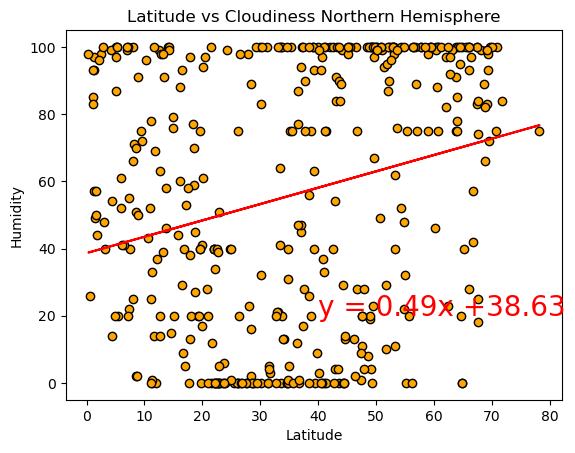

In [45]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values,color="orange",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title("Latitude vs Cloudiness Northern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig9.png")
plt.show()

In [48]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Cloudiness"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
1      54.537675
5      53.460649
7      55.368655
12     65.221039
20     71.937641
         ...    
554    71.463020
561    71.744460
566    64.033314
569    65.801423
571    70.314015
Name: Lat, Length: 164, dtype: float64
y = 0.35x +72.65


The r^2-value is: 0.021478264124490436


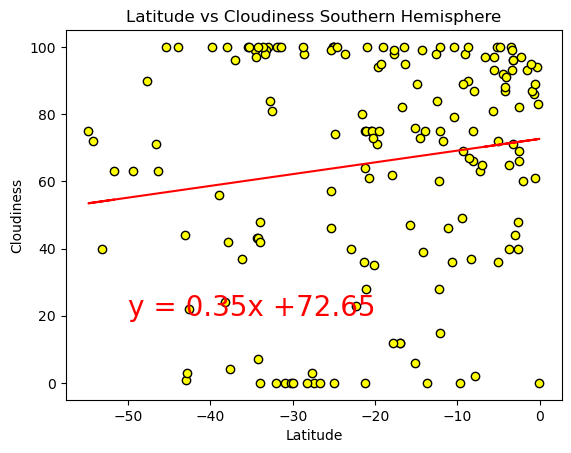

In [49]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values,color="yellow",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title("Latitude vs Cloudiness Southern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** In the northern hemisphere you can see in both ranges that the concentration is condensed, the values in the middle range are apart from each other, in the southern hemisphere the values are concenctrated in the top percntage of the graph.

### Wind Speed vs. Latitude Linear Regression Plot

In [53]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df['Lat'], northern_hemi_df["Wind Speed"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      4.000744
2      3.042731
3      3.135276
4      3.223114
6      3.790326
         ...   
567    3.982638
568    3.106852
570    3.169126
572    3.461761
573    3.089587
Name: Lat, Length: 410, dtype: float64
y = 0.02x +2.91


The r^2-value is: 0.014121132221924536


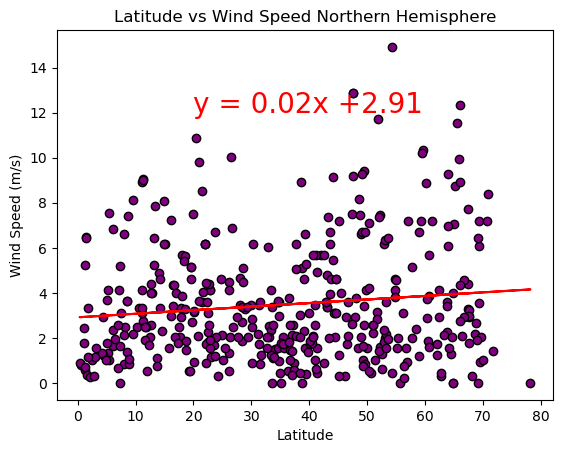

In [54]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values,color="Purple",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,12),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Latitude vs Wind Speed Northern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig11.png")
plt.show()

In [57]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df['Lat'], southern_hemi_df["Wind Speed"])
regress_values = x_values * slope + intercept
print(regress_values)    
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
1      5.128317
5      5.248861
7      5.035311
12     3.932599
20     3.180854
         ...   
554    3.233976
561    3.202476
566    4.065533
569    3.867640
571    3.362576
Name: Lat, Length: 164, dtype: float64
y = -0.04x +3.1


The r^2-value is: 0.042241065239355516


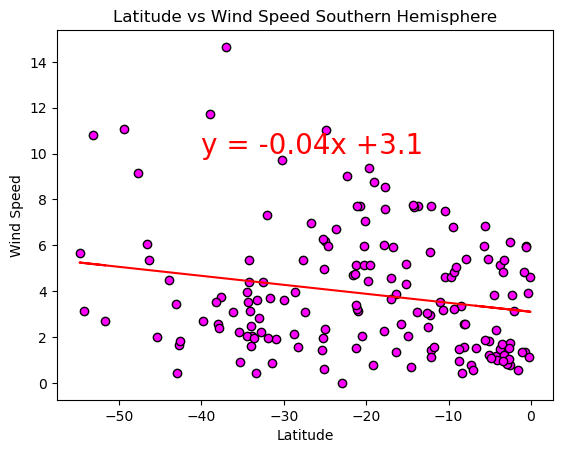

In [58]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values,color="magenta",edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=20,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title("Latitude vs Wind Speed Southern Hemisphere")
print(f"The r^2-value is: {rvalue**2}")
plt.savefig("output_data/Fig12.png")
plt.show()

**Discussion about the linear relationship:** In the southern hemisphere there are more wind speeds compared to the northern and the values go up much higher, the northern concentrate values below 4 and in the south some below 4 and much more above.